In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import geopandas as gpd
import folium

In [30]:
# configure the place, network type, trip times, and travel speed
# place = 'Somerville, MA, USA'
place = 'Utrecht, Netherlands'
network_type = 'bike'
trip_times = [5, 10, 15, 20, 25, 60] #in minutes
travel_speed = 4.5 #walking speed in km/hour

In [31]:
# download the street network
G = ox.graph_from_place(place, network_type=network_type)

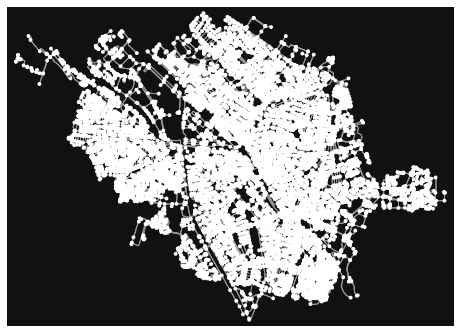

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [32]:
ox.plot_graph(G)

In [33]:
map = ox.plot_graph_folium(G, popup_attribute = 'osmid' , tiles = "openstreetmap", color="#333333", weight=1,)
map.save('map.html')

In [34]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [35]:
gdf_edges.head()

osmid   highway width  oneway reversed   length  \
u      v         key                                                        
140186 26810087  0      4389799  cycleway  4.00   False    False  113.119   
       242837370 0     22635923  cycleway   NaN   False    False  178.475   
       242837350 0    843406833  cycleway  4.00   False    False  112.881   
140272 268135909 0     24669535  cycleway   NaN    True    False   28.942   
       768136005 0     35600230  cycleway   NaN    True    False   55.468   

                                                               geometry lanes  \
u      v         key                                                            
140186 26810087  0    LINESTRING (5.11157 52.06048, 5.11177 52.06084...   NaN   
       242837370 0    LINESTRING (5.11157 52.06048, 5.11144 52.06051...   NaN   
       242837350 0    LINESTRING (5.11157 52.06048, 5.11119 52.05983...   NaN   
140272 268135909 0    LINESTRING (5.11547 52.07800, 5.11545 52.07803...   NaN   
       768136005 0    LINESTRING (5.11547 52.07800, 5.11550 52.07802...   NaN   

                     name maxspeed tunnel bridge service access junction  ref  
u      v         key                                                           
140186 26810087  0    NaN      NaN    NaN    NaN     NaN    NaN      NaN  NaN  
       242837370 0    NaN      NaN    NaN    NaN     NaN    NaN      NaN  NaN  
       242837350 0    NaN      NaN    NaN    NaN     NaN    NaN      NaN  NaN  
140272 268135909 0    NaN      NaN    NaN    NaN     NaN    NaN      NaN  NaN  
       768136005 0    NaN      NaN    NaN    NaN     NaN    NaN      NaN  NaN

In [36]:
np.unique(np.concatenate([np.array(x).reshape(-1) for x in gdf_edges['highway'].values]))

array(['bridleway', 'busway', 'cycleway', 'living_street', 'path',
       'pedestrian', 'primary', 'primary_link', 'residential',
       'secondary', 'secondary_link', 'service', 'tertiary',
       'tertiary_link', 'track', 'trunk', 'unclassified'], dtype='<U14')

In [37]:
bikable_roads = ['cycleway', 'living_street', 'path', 'pedestrian', 'track']

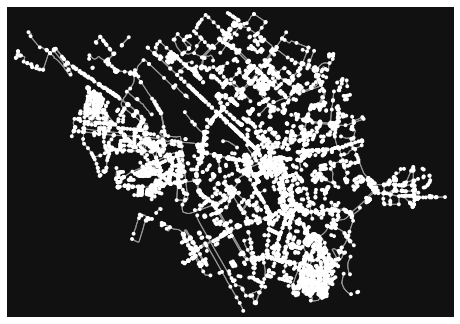

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [38]:
selected_edges = [(u,v, 0) for u,v,e in G.edges(data=True) if (e['highway'] in bikable_roads )]
H = G.edge_subgraph(selected_edges)
ox.plot_graph(H)

In [39]:
map = ox.plot_graph_folium(H, color="#ff0000", weight=5, popup_attribute = 'highway')
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(map)


map.save('map.html')

In [40]:
gdf_edges['width']


u           v           key
140186      26810087    0      4.00
            242837370   0       NaN
            242837350   0      4.00
140272      268135909   0       NaN
            768136005   0       NaN
                               ... 
9911705673  9911705672  0       NaN
9911708502  9911708503  0       NaN
            3831322164  0       NaN
            3835007715  0       NaN
9911708503  9911708502  0       NaN
Name: width, Length: 34577, dtype: object

In [41]:
gdf_edges[ ~ gdf_edges['width'].isna().values]

osmid   highway width  oneway reversed  \
u          v          key                                                
140186     26810087   0       4389799  cycleway  4.00   False    False   
           242837350  0     843406833  cycleway  4.00   False    False   
7727938    3002854938 0     296497491  cycleway     4   False     True   
7781352    261726396  0     127526337  cycleway  3.60   False    False   
           21425626   0     127526337  cycleway  3.60   False     True   
...                               ...       ...   ...     ...      ...   
9811429542 160389091  0     127323881  cycleway  4.00   False    False   
           9811429518 0     127323881  cycleway  4.00   False     True   
           45253062   0    1068851604  cycleway  2.75    True    False   
9811959492 9519197661 0     127361687  cycleway  3.50    True    False   
9885652376 526123421  0     107284269  cycleway  1.80    True    False   

                            length  \
u          v          key            
140186     26810087   0    113.119   
           242837350  0    112.881   
7727938    3002854938 0     90.475   
7781352    261726396  0     67.580   
           21425626   0     23.851   
...                            ...   
9811429542 160389091  0      3.399   
           9811429518 0     40.545   
           45253062   0     66.909   
9811959492 9519197661 0      3.921   
9885652376 526123421  0     11.029   

                                                                    geometry  \
u          v          key                                                      
140186     26810087   0    LINESTRING (5.11157 52.06048, 5.11177 52.06084...   
           242837350  0    LINESTRING (5.11157 52.06048, 5.11119 52.05983...   
7727938    3002854938 0    LINESTRING (5.12281 52.07883, 5.12278 52.07879...   
7781352    261726396  0      LINESTRING (5.12630 52.07641, 5.12713 52.07608)   
           21425626   0      LINESTRING (5.12630 52.07641, 5.12600 52.07652)   
...                                                                      ...   
9811429542 160389091  0      LINESTRING (5.14232 52.10211, 5.14229 52.10214)   
           9811429518 0      LINESTRING (5.14232 52.10211, 5.14270 52.10183)   
           45253062   0    LINESTRING (5.14232 52.10211, 5.14240 52.10216...   
9811959492 9519197661 0      LINESTRING (5.09820 52.12292, 5.09815 52.12291)   
9885652376 526123421  0    LINESTRING (5.15602 52.08292, 5.15599 52.08290...   

                          lanes                    name maxspeed tunnel  \
u          v          key                                                 
140186     26810087   0     NaN                     NaN      NaN    NaN   
           242837350  0     NaN                     NaN      NaN    NaN   
7727938    3002854938 0     NaN              Oosterkade      NaN    NaN   
7781352    261726396  0     NaN         Baden-Powellweg      NaN    NaN   
           21425626   0     NaN         Baden-Powellweg      NaN    NaN   
...                         ...                     ...      ...    ...   
9811429542 160389091  0     NaN  Kardinaal Alfrinkplein      NaN    NaN   
           9811429518 0     NaN  Kardinaal Alfrinkplein      NaN    NaN   
           45253062   0     NaN  Kardinaal Alfrinkplein      NaN    NaN   
9811959492 9519197661 0     NaN                     NaN      NaN    NaN   
9885652376 526123421  0     NaN   Weg tot de Wetenschap      NaN    NaN   

                          bridge service access junction  ref  
u          v          key                                      
140186     26810087   0      NaN     NaN    NaN      NaN  NaN  
           242837350  0      NaN     NaN    NaN      NaN  NaN  
7727938    3002854938 0      NaN     NaN    NaN      NaN  NaN  
7781352    261726396  0      NaN     NaN    NaN      NaN  NaN  
           21425626   0      NaN     NaN    NaN      NaN  NaN  
...                          ...     ...    ...      ...  ...  
9811429542 160389091  0      NaN     NaN    N